# Bad Data
### Jack Weissenberger

## 3-1 K-Cross Validation

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np

# load the digits data set
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [2]:
# print out the number of examples in the data set
print (len(digits.data))

1797


In [3]:
# print the target vector
print(digits.target)

[0 1 2 ... 8 9 8]


In [4]:
# print zero (0) as 8x8 image
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


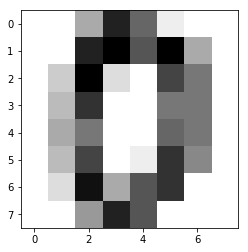

In [5]:
# visualize the zero (0) as an actual image
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [6]:
# specify SVM classifier
clf = svm.SVC(gamma=0.001, C=100)

In [7]:
#preform a random test train split on the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=1)

In [8]:
#pre allocating the correct amount of space for my variables for accuracy and number of k folds
acc = np.zeros((1,14))
k = np.zeros((1,14))

In [9]:
#this code iterates and calculates the accuracy of 2 to 15 folds of k-cross validation and stores them into vectors
from sklearn.model_selection import cross_val_score

#number of folds
folds = 2;

for i in range(0,14):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=folds,
                             n_jobs=1)

    k[0, i] = folds
    acc[0,i] = np.mean(scores)
    folds +=1

<function matplotlib.pyplot.show>

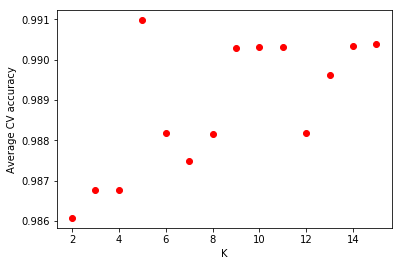

In [10]:
#this is a plot of the mean CV accuracy vs the number of k-folds
#we can see very generally that the accuracy tends to increase as the number of folds increases with a few outliers,
#which means we probably have a pretty good model
plt.plot(k, acc, 'ro')
plt.ylabel("Average CV accuracy")
plt.xlabel("K")
plt.show

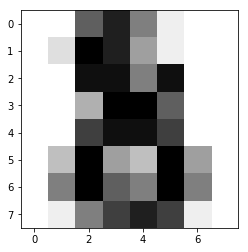

In [11]:
# visualize the prediction as an actual image
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

## 3-2 Imputing Missing Data

In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
# load the diabetes data set
diabetes = pd.read_csv('pima-indians-diabetes.csv', header=None)
print(diabetes.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [3]:
# print out the top 20 values in the data set
print(diabetes.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [4]:
#this loads an imputer that fills every zero in the dataset (without the last column), with the mean of that column
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values=0, strategy='mean', axis=0)
imr = imr.fit(diabetes.iloc[:, :7])
imputed_data = imr.transform(diabetes.iloc[:, :7])
diabetes.iloc[:, :7] = imputed_data

In [5]:
#here are the first 5 columns to show that in columns 0 to 7, every 0 has been filled with the mean of that column
diabetes[0:5]

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [6]:
# how many blank values, we can see that they have been replaced 
print((diabetes == 0).sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8    500
dtype: int64


In [7]:
# specify Logistic Regression classifier
clf = LogisticRegression()

In [8]:
array=diabetes.values
X = array[:,0:8]
Y = array[:,8]
print (X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [9]:
# We split the data into training and test set
array=diabetes.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print('Accuracy: %.3f%%' % (clf.score(X_test, Y_test)*100.0))

Accuracy: 77.165%
